# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [29]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 設定 data_path
dir_data = './data/'

In [30]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [31]:
df = pd.concat([app_train])
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

41 Integer Features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

65 Float Features : ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OW

## 練習時間

In [33]:
df[int_features].mean()

SK_ID_CURR                     278180.518577
TARGET                              0.080729
CNT_CHILDREN                        0.417052
DAYS_BIRTH                     -16036.995067
DAYS_EMPLOYED                   63815.045904
DAYS_ID_PUBLISH                 -2994.202373
FLAG_MOBIL                          0.999997
FLAG_EMP_PHONE                      0.819889
FLAG_WORK_PHONE                     0.199368
FLAG_CONT_MOBILE                    0.998133
FLAG_PHONE                          0.281066
FLAG_EMAIL                          0.056720
REGION_RATING_CLIENT                2.052463
REGION_RATING_CLIENT_W_CITY         2.031521
HOUR_APPR_PROCESS_START            12.063419
REG_REGION_NOT_LIVE_REGION          0.015144
REG_REGION_NOT_WORK_REGION          0.050769
LIVE_REGION_NOT_WORK_REGION         0.040659
REG_CITY_NOT_LIVE_CITY              0.078173
REG_CITY_NOT_WORK_CITY              0.230454
LIVE_CITY_NOT_WORK_CITY             0.179555
FLAG_DOCUMENT_2                     0.000042
FLAG_DOCUM

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [40]:
df[int_features].std()

SK_ID_CURR                     102790.175348
TARGET                              0.272419
CNT_CHILDREN                        0.722121
DAYS_BIRTH                       4363.988632
DAYS_EMPLOYED                  141275.766519
DAYS_ID_PUBLISH                  1509.450419
FLAG_MOBIL                          0.001803
FLAG_EMP_PHONE                      0.384280
FLAG_WORK_PHONE                     0.399526
FLAG_CONT_MOBILE                    0.043164
FLAG_PHONE                          0.449521
FLAG_EMAIL                          0.231307
REGION_RATING_CLIENT                0.509034
REGION_RATING_CLIENT_W_CITY         0.502737
HOUR_APPR_PROCESS_START             3.265832
REG_REGION_NOT_LIVE_REGION          0.122126
REG_REGION_NOT_WORK_REGION          0.219526
LIVE_REGION_NOT_WORK_REGION         0.197499
REG_CITY_NOT_LIVE_CITY              0.268444
REG_CITY_NOT_WORK_CITY              0.421124
LIVE_CITY_NOT_WORK_CITY             0.383817
FLAG_DOCUMENT_2                     0.006502
FLAG_DOCUM

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0.]),
 array([0.        , 0.0002439 , 0.0004878 , 0.00073171, 0.00097561,
        0.00121951, 0.00146341, 0.00170732, 0.00195122, 0.00219512,
        0.00243902, 0.00268293, 0.00292683, 0.00317073, 0.00341463,
        0.00365854, 0.00390244, 0.00414634, 0.00439024, 0.00463415,
        0.00487805, 0.00512195, 0.00536585, 0.00560976, 0.00585366,
        0.00609756, 0.00634146, 0.00658537, 0.00682927, 0.00707317,
        0.00731707, 0.00756098, 0.00780488, 0.00804878, 0.00829268,
        0.00853659, 0.00878049, 0.00902439, 0.00926829, 0.0095122 ,
        0.0097561 , 0.01      ]),
 <BarContainer object of 41 artists>)

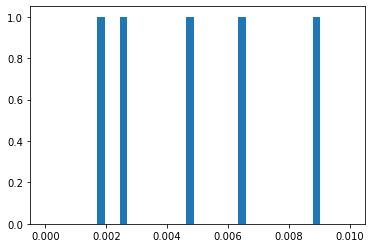

In [56]:

plt.hist(df[int_features].std(),bins=41,range=(0,0.01))

In [ ]:
#為什麼圖那麼醜ㄚㄚㄚㄚㄚㄚ